In [12]:
import pandas as pd
# loaded_df = pd.read_json('eval_baselines_200k.json')
# loaded_df = pd.read_json('attempt10_150M_200k_focal_accuracy_2.json')
# loaded_df = pd.read_json('attempt10_150M_200k_focal_accuracy_2200.json')
# loaded_df = pd.read_json('attempt12_150M_200k_weighted_accuracy_3_200_validation.json')
# loaded_df = pd.read_json('attempt11_150M_200k_focal_accuracy_2_2000_validation.json')
# loaded_df = pd.read_json('eval_bepi2_30k_attempt11_150M_200k_focal_accuracy_2.json')
 
# loaded_df = pd.read_json('attempt9_150M_200k_default_accuracy_2000_validation.json')
# loaded_df = pd.read_json('attempt13_150M_200k_weighted_accuracy_14_masked_2000_validation.json')
# loaded_df = pd.read_json('attempt13_150M_200k_weighted_accuracy_14_2000_validation.json')
# loaded_df = pd.read_json('attempt13_150M_200k_weighted_accuracy_100_200_validation.json')
# print(len(loaded_df['True Labels'][0]))
# Load the DataFrame from the JSON file

# Extracting data into the original variable names for pipe1
# sequences = loaded_df['Sequence'].tolist()
# ids = loaded_df['ID'].tolist()
# true_labels = loaded_df['True Labels'].tolist()
# print(loaded_df['True Labels'])

loaded_df1 = pd.read_json('default_5k_3k_validation.json')
true_labels = loaded_df1['True Labels'].tolist()
predicted_labels_pipe1 = loaded_df1['Predicted Labels Pipe1'].tolist()
predicted_scores_pipe1 = loaded_df1['Predicted Scores Pipe1'].tolist()
TP_pipe1 = loaded_df1['TP Pipe1'].tolist()
TN_pipe1 = loaded_df1['TN Pipe1'].tolist()
FP_pipe1 = loaded_df1['FP Pipe1'].tolist()
FN_pipe1 = loaded_df1['FN Pipe1'].tolist()

# Extracting data into the original variable names for pipe2
loaded_df2 = pd.read_json('default_5k_3k_validation.json')
predicted_labels_pipe2 = loaded_df2['Predicted Labels Pipe1'].tolist()
predicted_scores_pipe2 = loaded_df2['Predicted Scores Pipe1'].tolist()
TP_pipe2 = loaded_df2['TP Pipe1'].tolist()
TN_pipe2 = loaded_df2['TN Pipe1'].tolist()
FP_pipe2 = loaded_df2['FP Pipe1'].tolist()
FN_pipe2 = loaded_df2['FN Pipe1'].tolist()

# Extracting data into the original variable names for pipe3
# # loaded_df3 = pd.read_json('bepi3_eval_3k_attempt9_150M_200k_default_accuracy.json')
# loaded_df3 = pd.read_json('bepi2_eval_30k_attempt9_150M_200k_default_accuracy.json')
# loaded_df3 = pd.read_json('bepi3_eval_3k_attempt11_150M_200k_focal_accuracy_5.json')
# loaded_df3 = pd.read_json('bepi2_eval_30k_attempt11_150M_200k_focal_accuracy_5.json')

# loaded_df3 = pd.read_json('bepi2_eval_30k_attempt12_150M_200k_focal_accuracy.json')
loaded_df3 = pd.read_json('default_50k_3k_validation.json')
predicted_labels_pipe3 = loaded_df3['Predicted Labels Pipe1'].tolist()
predicted_scores_pipe3 = loaded_df3['Predicted Scores Pipe1'].tolist()
TP_pipe3 = loaded_df3['TP Pipe1'].tolist()
TN_pipe3 = loaded_df3['TN Pipe1'].tolist()
FP_pipe3 = loaded_df3['FP Pipe1'].tolist()
FN_pipe3 = loaded_df3['FN Pipe1'].tolist()

print(true_labels[:1])


[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [13]:
import evaluate
import pandas as pd
from sklearn.metrics import matthews_corrcoef
p1 = 'weighted 14x'
p2 = 'weighted 3x'
p3 = 'weighted gamma=2'
# Convert labels to string format for evaluation
string_predicted_labels_pipe1 = [['EPITOPE' if label == 1 else 'O' for label in sequence] for sequence in predicted_labels_pipe1]
string_true_labels = [['EPITOPE' if label == 1 else 'O' for label in sequence] for sequence in true_labels]
string_predicted_labels_pipe2 = [['EPITOPE' if label == 1 else 'O' for label in sequence] for sequence in predicted_labels_pipe2]
string_predicted_labels_pipe3 = [['EPITOPE' if label == 1 else 'O' for label in sequence] for sequence in predicted_labels_pipe3]

# Load the seqeval evaluation module
seqeval = evaluate.load("seqeval")

# Compute metrics for pipe1
results_pipe1 = seqeval.compute(predictions=string_predicted_labels_pipe1, references=string_true_labels)

# # Compute metrics for pipe2
results_pipe2 = seqeval.compute(predictions=string_predicted_labels_pipe2, references=string_true_labels)

# # Compute metrics for pipe3
results_pipe3 = seqeval.compute(predictions=string_predicted_labels_pipe3, references=string_true_labels)

# Function to calculate MCC
def calculate_mcc(true_labels, predicted_labels):
    # Flatten the list of labels to make them compatible with sklearn's matthews_corrcoef
    true_labels_flat = [label for sequence in true_labels for label in sequence]
    predicted_labels_flat = [label for sequence in predicted_labels for label in sequence]
    print(true_labels_flat)

    # Convert labels to binary format
    true_labels_binary = [1 if label == 'EPITOPE' else 0 for label in true_labels_flat]
    predicted_labels_binary = [1 if label == 'EPITOPE' else 0 for label in predicted_labels_flat]

    # Calculate MCC
    return matthews_corrcoef(true_labels_binary, predicted_labels_binary)

# Compute MCC for each pipeline
mcc_pipe1 = calculate_mcc(string_true_labels, string_predicted_labels_pipe1)
mcc_pipe2 = calculate_mcc(string_true_labels, string_predicted_labels_pipe2)
mcc_pipe3 = calculate_mcc(string_true_labels, string_predicted_labels_pipe3)

# Update the DataFrame to include MCC
results_df = pd.DataFrame({
    'Metrics': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'MCC'],
    f'{p1}': [results_pipe1["overall_precision"], results_pipe1["overall_recall"], results_pipe1["overall_f1"], results_pipe1["overall_accuracy"], mcc_pipe1],
    f'{p2}': [results_pipe2["overall_precision"], results_pipe2["overall_recall"], results_pipe2["overall_f1"], results_pipe2["overall_accuracy"], mcc_pipe2],
    f'{p3}': [results_pipe3["overall_precision"], results_pipe3["overall_recall"], results_pipe3["overall_f1"], results_pipe3["overall_accuracy"], mcc_pipe3]
})


# Print results for verification
print(results_df)

# Save results to a CSV file
# results_df.to_csv('prfa_baselines_200k.csv', index=False)


/home/jiaweim/.conda/envs/epi/lib/python3.11/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: EPITOPE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     Metrics  weighted 14x  weighted 3x  weighted gamma=2
0  Precision      0.086389     0.086389          0.076348
1     Recall      0.079731     0.079731          0.077160
2   F1-Score      0.082926     0.082926          0.076752
3   Accuracy      0.938815     0.938815          0.935594
4        MCC      0.051375     0.051375          0.043386


In [14]:
from itertools import chain

# Flatten the scores for pipe1 and pipe2
scores_flat_pipe1 = list(chain.from_iterable(predicted_scores_pipe1))
scores_flat_pipe2 = list(chain.from_iterable(predicted_scores_pipe2))
scores_flat_pipe3 = list(chain.from_iterable(predicted_scores_pipe3))

# Flatten the predicted labels for pipe1 and pipe2
predicted_flat_pipe1 = list(chain.from_iterable(predicted_labels_pipe1))
predicted_flat_pipe2 = list(chain.from_iterable(predicted_labels_pipe2))
predicted_flat_pipe3 = list(chain.from_iterable(predicted_labels_pipe3))

# Flatten the true labels (common for both pipelines)
true_flat = list(chain.from_iterable(true_labels))

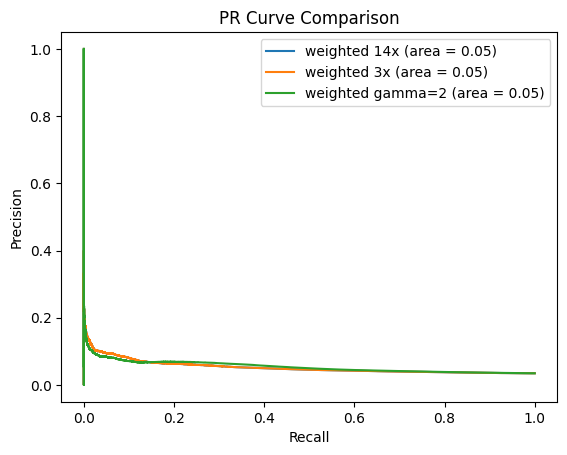

Pipe1 Metrics:
F1: 0.9376309799613448
Accuracy: 0.9388147676132064
Precision: 0.08638873687876225
Recall: 0.07973093964507909

Pipe2 Metrics:
F1: 0.9376309799613448
Accuracy: 0.9388147676132064
Precision: 0.08638873687876225
Recall: 0.07973093964507909

Pipe3 Metrics:
F1: 0.9357577024056903
Accuracy: 0.9355936118523238
Precision: 0.07634818954159284
Recall: 0.07715971441034


In [15]:
from sklearn.metrics import f1_score, precision_recall_curve, auc, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Compute Precision-Recall curve and AUC for pipe1
precision_pipe1, recall_pipe1, _ = precision_recall_curve(true_flat, scores_flat_pipe1)
auc_score_pipe1 = auc(recall_pipe1, precision_pipe1)

# Compute Precision-Recall curve and AUC for pipe2
precision_pipe2, recall_pipe2, _ = precision_recall_curve(true_flat, scores_flat_pipe2)
auc_score_pipe2 = auc(recall_pipe2, precision_pipe2)

# Compute Precision-Recall curve and AUC for pipe3
precision_pipe3, recall_pipe3, _ = precision_recall_curve(true_flat, scores_flat_pipe3)
auc_score_pipe3 = auc(recall_pipe3, precision_pipe3)

# Plotting both Precision-Recall curves
plt.figure()
plt.plot(recall_pipe1, precision_pipe1, label=f'{p1} (area = {auc_score_pipe1:.2f})')
plt.plot(recall_pipe2, precision_pipe2, label=f'{p2} (area = {auc_score_pipe2:.2f})')
plt.plot(recall_pipe3, precision_pipe3, label=f'{p3} (area = {auc_score_pipe3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve Comparison')
plt.legend(loc='best')
plt.show()

# Compute F1, Accuracy, Precision, and Recall for pipe1
f1_pipe1 = f1_score(true_flat, predicted_flat_pipe1, average='weighted')
accuracy_pipe1 = np.mean(np.array(predicted_flat_pipe1) == np.array(true_flat))
precision_pipe1 = precision_score(true_flat, predicted_flat_pipe1)
recall_pipe1 = recall_score(true_flat, predicted_flat_pipe1)

# Compute F1, Accuracy, Precision, and Recall for pipe2
f1_pipe2 = f1_score(true_flat, predicted_flat_pipe2, average='weighted')
accuracy_pipe2 = np.mean(np.array(predicted_flat_pipe2) == np.array(true_flat))
precision_pipe2 = precision_score(true_flat, predicted_flat_pipe2)
recall_pipe2 = recall_score(true_flat, predicted_flat_pipe2)

# # Compute F1, Accuracy, Precision, and Recall for pipe3
f1_pipe3 = f1_score(true_flat, predicted_flat_pipe3, average='weighted')
accuracy_pipe3 = np.mean(np.array(predicted_flat_pipe3) == np.array(true_flat))
precision_pipe3 = precision_score(true_flat, predicted_flat_pipe3)
recall_pipe3 = recall_score(true_flat, predicted_flat_pipe3)

# Print the metrics
print('Pipe1 Metrics:')
print('F1:', f1_pipe1)
print('Accuracy:', accuracy_pipe1)
print('Precision:', precision_pipe1)
print('Recall:', recall_pipe1)
print('\nPipe2 Metrics:')
print('F1:', f1_pipe2)
print('Accuracy:', accuracy_pipe2)
print('Precision:', precision_pipe2)
print('Recall:', recall_pipe2)
print('\nPipe3 Metrics:')
print('F1:', f1_pipe3)
print('Accuracy:', accuracy_pipe3)
print('Precision:', precision_pipe3)
print('Recall:', recall_pipe3)

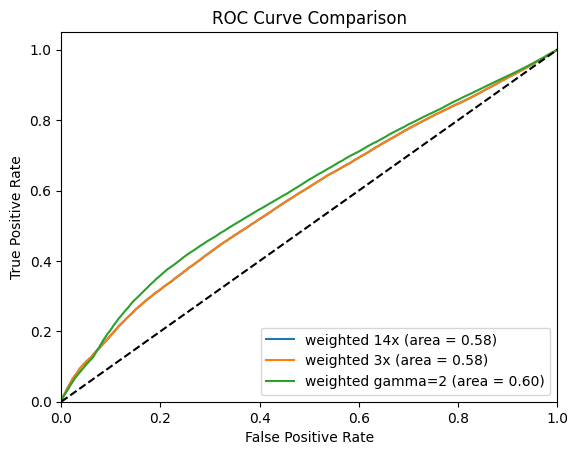

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for pipe1
fpr_pipe1, tpr_pipe1, _ = roc_curve(true_flat, scores_flat_pipe1)
roc_auc_pipe1 = roc_auc_score(true_flat, scores_flat_pipe1)

# Compute ROC curve and AUC for pipe2
fpr_pipe2, tpr_pipe2, _ = roc_curve(true_flat, scores_flat_pipe2)
roc_auc_pipe2 = roc_auc_score(true_flat, scores_flat_pipe2)

# Compute ROC curve and AUC for pipe3
fpr_pipe3, tpr_pipe3, _ = roc_curve(true_flat, scores_flat_pipe3)
roc_auc_pipe3 = roc_auc_score(true_flat, scores_flat_pipe3)

# Plotting both ROC curves
plt.figure()
plt.plot(fpr_pipe1, tpr_pipe1, label=f'{p1} (area = {roc_auc_pipe1:.2f})')
plt.plot(fpr_pipe2, tpr_pipe2, label=f'{p2} (area = {roc_auc_pipe2:.2f})')
plt.plot(fpr_pipe3, tpr_pipe3, label=f'{p3} (area = {roc_auc_pipe3:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

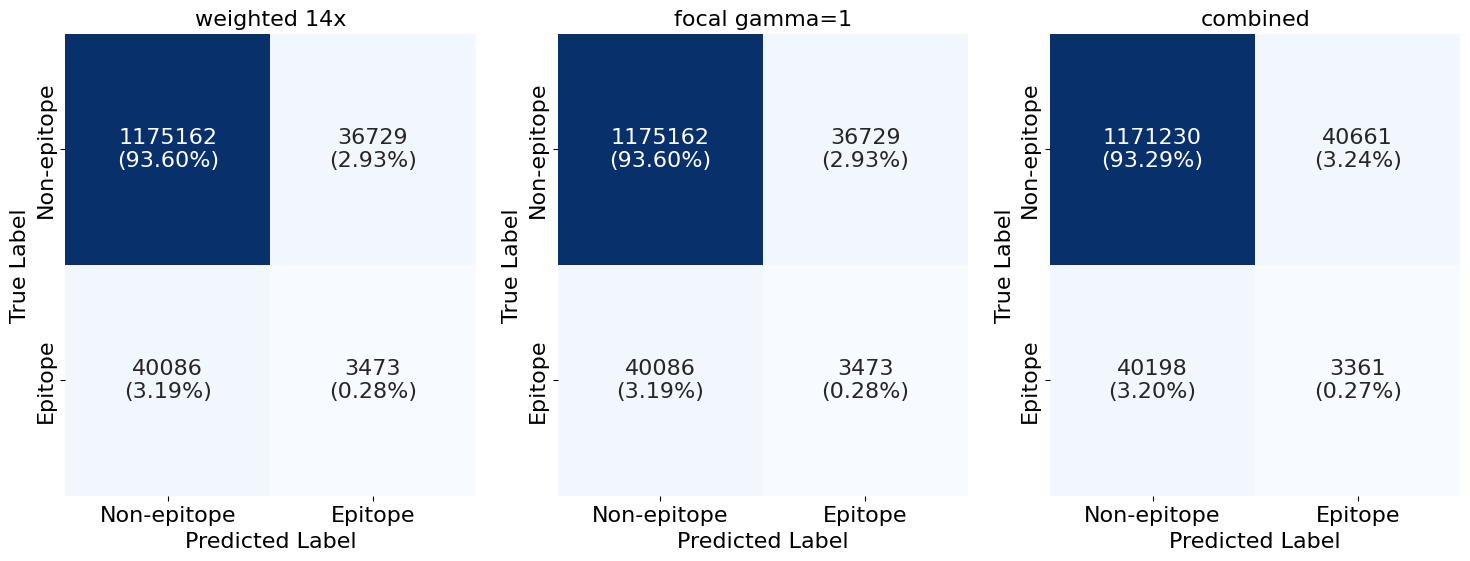

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
p1 = 'weighted 14x'
p2 = 'focal gamma=1'
p3 = 'combined'
# Generate the confusion matrices
cm_pipe1 = confusion_matrix(true_flat, predicted_flat_pipe1)
cm_pipe2 = confusion_matrix(true_flat, predicted_flat_pipe2)
cm_pipe3 = confusion_matrix(true_flat, predicted_flat_pipe3)  

# Calculate the percentage matrices
cm_pipe1_percent = cm_pipe1 / cm_pipe1.sum() * 100
cm_pipe2_percent = cm_pipe2 / cm_pipe2.sum() * 100
cm_pipe3_percent = cm_pipe3 / cm_pipe3.sum() * 100

# Labels for the classes
labels = ['Non-epitope', 'Epitope']

# Setting up the figure for the subplots
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted figure size

# Annotations font size
annot_font_size = 16  # Adjust as needed

# Function to format the annotations
def get_annotations(cm, cm_percent):
    annot = np.empty_like(cm, dtype=object)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percent[i, j]
            annot[i, j] = f'{c}\n({p:.2f}%)'
    return annot

# Plotting each confusion matrix with percentages and counts
sns.heatmap(cm_pipe1_percent, ax=axes[0], annot=get_annotations(cm_pipe1, cm_pipe1_percent), fmt='', xticklabels=labels, yticklabels=labels, cmap='Blues', annot_kws={"size": annot_font_size}, cbar=False)
sns.heatmap(cm_pipe2_percent, ax=axes[1], annot=get_annotations(cm_pipe2, cm_pipe2_percent), fmt='', xticklabels=labels, yticklabels=labels, cmap='Blues', annot_kws={"size": annot_font_size}, cbar=False)
sns.heatmap(cm_pipe3_percent, ax=axes[2], annot=get_annotations(cm_pipe3, cm_pipe3_percent), fmt='', xticklabels=labels, yticklabels=labels, cmap='Blues', annot_kws={"size": annot_font_size}, cbar=False)

fontsize = 16
# Setting titles
axes[0].set_title(f'{p1}', fontsize=fontsize)
axes[1].set_title(f'{p2}', fontsize=fontsize)
axes[2].set_title(f'{p3}', fontsize=fontsize)

# Setting the labels
for ax in axes:
    ax.set_xlabel('Predicted Label', fontsize=fontsize)
    ax.set_ylabel('True Label', fontsize=fontsize)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
    
axes.set_xlabel('Predicted Label', fontsize=fontsize)
axes.set_ylabel('True Label', fontsize=fontsize)
axes.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)
axes.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)

# Adjusting layout
plt.tight_layout()

# Overall title
fig.suptitle('Confusion Matrices', fontsize=20, y=1.05)

# Show the plot
plt.show()
